## 2장 사이킷런으로 시작하는 머신러닝
- 사이킷런은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 파이토치, 텐서플로 등 딥러닝 전문 라이브러리가 강세이지만 데이터 분석가가 의존하는 대표적인 ML 라이브러리


In [2]:
#설치 방법
#conda install scikit-learn
#pip inastall scikit-learn

## 2 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
- 붓꽃 데이터 셋은 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것

- 분류는 대표적인 지도학습 방법 중 하나
- 지도학습은 학습을 위한 다양한 피쳐와 분류 결정값인 레이블 데이터로 모델을 학습
- 별도의 테스트 데이터 셋에서 미지의 레이블을 예측
- 학습을 위해 주어진 데이터 셋을 학습 데이터 셋, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 테스트 데이터 셋을 활용

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd

#붓꽃 데이터 세트를 로딩
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [15]:
#iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris['data']

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label=iris['target']
print('iris target값:', iris_label)
print('iris target명:', iris['target_names'])

#붓꽃 데이터 세트를 자세히 보기 위해 데이터프레임으로 변환
iris_df=pd.DataFrame(data=iris_data, columns=iris['feature_names'])
iris_df['label']=iris['target']
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2, #테스트 데이터에 20%, 학습 데이터에 80%로 쪼개서 넣어준다
                                                    random_state=11)

In [23]:
print(f'X_train:{X_train.shape}, y_train:{y_train.shape}')
print(f'X_test:{X_test.shape}, y_test:{y_test.shape}')

X_train:(120, 4), y_train:(120,)
X_test:(30, 4), y_test:(30,)


In [25]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [29]:
# DecisionTreeClassifier객체 생성
df_clf=DecisionTreeClassifier(random_state=11)

#학습 수행
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [31]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred=df_clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score #맞춘 비율 나타내기 위함
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


In [37]:
print(f'실제 정답{y_test}') # 2개밖에 안틀림. 정확도가 높은 알고리즘
print(f'컴터 정답{pred}')

실제 정답[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
컴터 정답[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


### 머신러닝 기본 프로세스
1. 데이터 셋 분리: 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습: 학습 데이터를 기반으로 머신러닝 알고리즘을 적용하여 모델 학습
3. 예측 수행: 학습된 ML모델을 이용해 테스트 데이터의 분류를 예측
4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 머신러닝 모델 성능을 평가

## 3 사이킷런 기반 프레임워크 익히기
### Estimator 이해 및 fit()(공부해라), predict()(문제 풀어라) 메서드

In [44]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [46]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:',keys)
print(iris_data['target_names'])

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


In [56]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print('feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print('target_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:',type(iris_data.data))
print('data의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print('target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
target_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [

## 학습/테스트 데이터 셋 분리 - train_test_split()

In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label, pred))
#이미 답을 알고 시험을 치는 것과 같다

예측 정확도: 1.0


In [63]:
from sklearn.model_selection import train_test_split

dt_clf=DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.3, #테스트 데이터에 30%, 학습 데이터에 70%로 쪼개서 넣어준다
                                                    random_state=121)

In [65]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
print(f'X_test.shape : {X_test.shape}, X_train.shape:{X_train.shape}') 
#테스트 데이터는 45개 정도밖에 되지 않아 예측 성능을 판단하기에는 그리 적절치 않다.

예측 정확도: 0.9556
X_test.shape : (45, 4), X_train.shape:(105, 4)


## 교차 검증
- ML 알고리즘으로 학습을 시킨 뒤 성능 평가를 하기 위해 별도의 테스트 데이터를 사용하는데. 이 방법 역시 과적합이 발생 할 수 있다.
- ML은 신뢰성 높은 데이터 셋이 많을 수록 성능이 통상적으로 좋음
- 데이터 셋이 적을 경우 모델에 최대한 많은 데이터를 보여주기 위해 사용
- 과대적합: 학습한 내용에만 과의존  과소적합: 학습을 더 할 수 있지만 하지않은 상태

### K 폴드 교차 검증
- 가장 보편적으로 사용되는 교차 검증 기법
- K개의 데이터 폴드 세트를 만들어 K번 만큼 각 폴드에 학습과 검증 평가를 반복적으로 수행하는 방법

In [114]:
from sklearn.model_selection import KFold
import numpy as np

iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체의 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold=KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [116]:
n_iter=0

#KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    n_iter += 1
    
    #반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:',np.mean(cv_accuracy))

#정답의 개수가 들쑥날쑥함 어떤 것은 0의 정답만 어떤 것은 0과 1의 정답만 어떤 것은 2의 정답만 가짐


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [118]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [120]:
kfold=KFold(n_splits=3)
#kfold.split(X)는 폴드 세트를 3번 반복할때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 변환
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


In [126]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [128]:
from sklearn.model_selection import StratifiedKFold

dt_clf=DecisionTreeClassifier(random_state=156)

skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]


#StratifiedKFold의 split()를 호출하면 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    
    
    #반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:',np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:',np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


In [130]:
from sklearn.model_selection import cross_val_score, cross_validate

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

#성능 지표는 정확도, 교차 검증 세트는 5개
scores=cross_val_score(dt_clf ,
                       data,
                       label,
                       scoring='accuracy',
                       cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:',np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.9667 0.9667 0.9    0.9667 1.    ]
평균 검증 정확도: 0.96


## GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

### 주요 파라미터
- estimator
- param_grid: key + 리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.
- scoring: 예측 성능을 측정할 평가 방법 지정.
- cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
- refit: 디폴트가 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체에 해당 하이퍼 파라미터로 재학습시킨다

In [139]:
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.3,
                                                    random_state=121)
dtree=DecisionTreeClassifier()

## parameter 둘울 dictionary 형태로 설정
parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [141]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score',
           'rank_test_score','split0_test_score',
           'split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.657143,5,0.657143,0.657143,0.657143
1,"{'max_depth': 1, 'min_samples_split': 3}",0.657143,5,0.657143,0.657143,0.657143
2,"{'max_depth': 2, 'min_samples_split': 2}",0.933333,3,0.942857,0.914286,0.942857
3,"{'max_depth': 2, 'min_samples_split': 3}",0.933333,3,0.942857,0.914286,0.942857
4,"{'max_depth': 3, 'min_samples_split': 2}",0.942857,1,0.971429,0.914286,0.942857
5,"{'max_depth': 3, 'min_samples_split': 3}",0.942857,1,0.971429,0.914286,0.942857


In [143]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9429


In [147]:
#GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_esdimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9556


## 5 데이터 전처리
- ML 알고리즘에 학습데이터를 입력으로 사용하기 위해서는 NaN, Null값은 허용되지 않기 때문에 다른 값으로 처리해야 함
- 문자열도 허용되지 않기 때문에 이를 숫자값으로 변환해야 함

### 데이터 인코딩
- 머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩과 원-핫 인코딩이 있음
  - 레이블 인코딩: 카테고리 피처를 코드형 숫자값으로 변환
  - 원-핫 인코딩: 피처 값 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에 1을 표시하고, 나머지에는 0을 표시

In [162]:
#레이블 인코딩

In [154]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 label 인코딩 수정
encoder=LabelEncoder()
encoder.fit(items) #인코딩. 학습할 준비해라
labels=encoder.transform(items) #items를 인코딩한 변수를 labels 객체에 담음
print('인코딩 반환값:',labels)

인코딩 반환값: [0 1 4 5 3 3 2 2]


In [156]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [160]:
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [164]:
#원-핫 인코딩

In [166]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자값으로 변환을 위해 LabelEncoder로 변환한다.
encoder=LabelEncoder()
labels=encoder.fit_transform(items)

In [168]:
labels.shape

(8,)

In [170]:
labels

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [172]:
#2차원 데이터로 변환
labels=labels.reshape(-1,1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]], dtype=int64)

In [176]:
#원-핫 인코딩을 적용합니다
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [178]:
import pandas as pd
df=pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터',
                         '선풍기','선풍기','믹서','믹서']})

In [180]:
pd.get_dummies(df).astype('int') #원-핫 인코딩을 더 쉽게 지원하는 get_dummies() API가 있다.

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피쳐 스케일링과 정규화
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 한다.
- 표준화: 데이터의 피처 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 반환하는 것을 의미

StandardScaler
- 서포트 벡터머신

In [186]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [192]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler=StandardScaler()

#StandardScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [196]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler =MinMaxScaler()

#MinMaxScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환 돼 이를 데이터프레임으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소값')
print(iris_df_scaled.min())
print('\nfeature들의 최대값')
print(iris_df_scaled.max())


feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [199]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [201]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 반환
scaler = MinMaxScaler()

#fit()하게 되면 test_array 데이터의 최솟값이 0, 최댓값이 5으로 설정
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 반환함. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력
print(f'원본 test_array 데이터: {np.round(test_array.reshape(-1),2)}')
print(f'scale된 test_array 데이터: {np.round(test_scaled.reshape(-1),2)}')

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [203]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 반환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 5으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 반환함. 원본 10->1로 변환
train_scaled = scaler.transform(train_array)

#train_array의 scale 변환 출력
print(f'원본 train_array 데이터: {np.round(train_array.reshape(-1),2)}')
print(f'scale된 train_array 데이터: {np.round(train_scaled.reshape(-1),2)}')

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [205]:
#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함

test_scaled = scaler.transform(test_array)

print(f'원본 test_array 데이터: {np.round(test_array.reshape(-1),2)}')
print(f'scale된 test_array 데이터: {np.round(test_scaled.reshape(-1),2)}')

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


### 학습 데이터와 테스트 데이터의 fit(), transform(), fit_transform()을 이용해 스케일링 변환 시 유의할 점
 1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
 2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform() 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

## 6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [3]:
#kaggle에서 Titanic - Machine Learning from Disaster 검색.
#train.csv 데이터 다운로드

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("C:/py_data/titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
#데이터셋을 잘 분석해보고 필요없는 column 삭제하기 Name, Ticket
print('\n ### train 데이터 정보 ### \n')
print(titanic_df.info())
#null값이 많은 Cabin도 삭제하자


 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
print(f'데이터 세트 Null 값 개수 \n{titanic_df.isnull().sum()}')

데이터 세트 Null 값 개수 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
import warnings #주피터 경고 메시지 무시 코드
warnings.filterwarnings(action='ignore')

In [15]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #Age의 평균값을 널 값에 넣어 대체
titanic_df['Cabin'].fillna('N', inplace=True) #Cabin의 널 값을 'N'으로 대체
titanic_df['Embarked'].fillna('N', inplace=True) #Embarked의 널 값을 'N'으로 대체
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())
#각 컬럼의 null 개수 합을 또 합해서 한 번에 보여줌

데이터 세트 Null 값 개수 0


In [19]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [21]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [23]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] #차원이 많아지면 원-핫 인코딩의 질이 떨어질 수 있다.
print(titanic_df['Cabin'].head(3))
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())

0    N
1    C
2    N
Name: Cabin, dtype: object

 Cabin 값 분포 :
 Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [25]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

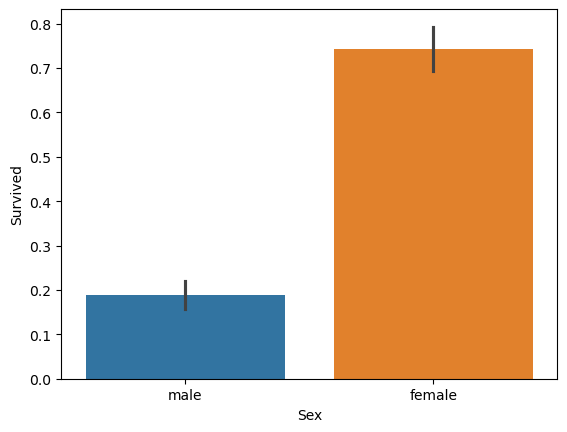

In [33]:
sns.barplot(x='Sex', y='Survived', hue='Sex', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

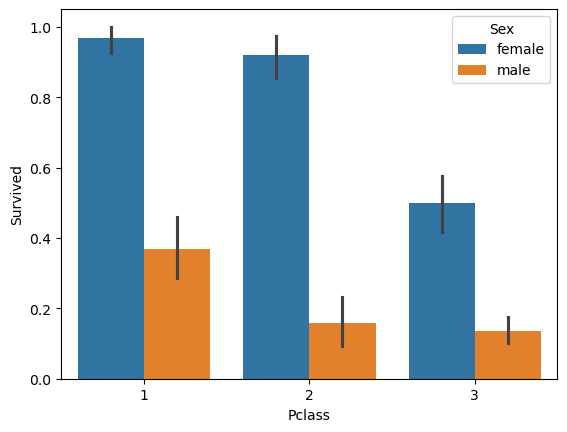

In [35]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [37]:
print(titanic_df['Age'].min())
print(titanic_df['Age'].max())

0.42
80.0


In [39]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. 데이터프레임의 apply lambda식에 적용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat

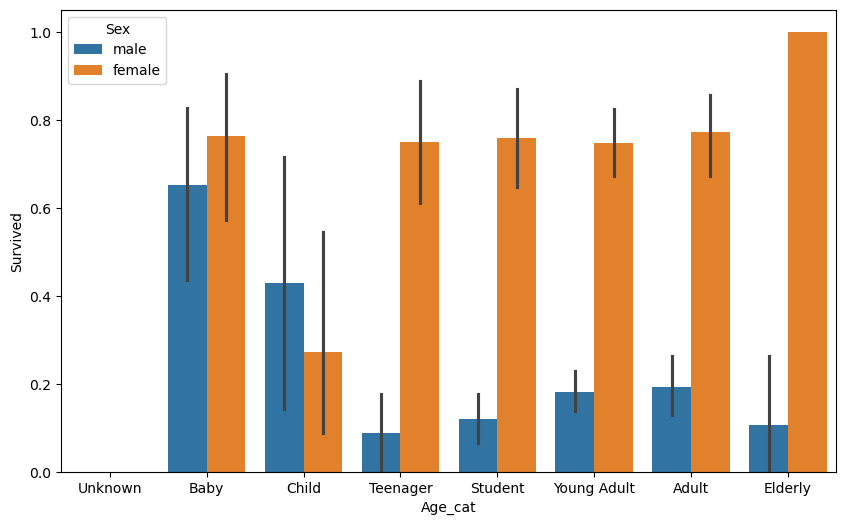

In [41]:
#막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

#x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student',
               'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(x)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [49]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

In [51]:
#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [53]:
#원본 데이터를 재로딩하고, 피처 데이터 세트의 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('c:/py_data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [55]:
y_titanic_df.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)
print(f'X_train 크기: {X_train.shape}, y_train 크기: {y_train.shape}')
print(f'X_test 크기: {X_test.shape}, y_test 크기: {y_test.shape}')

X_train 크기: (712, 8), y_train 크기: (712,)
X_test 크기: (179, 8), y_test 크기: (179,)


In [79]:
from sklearn.tree import DecisionTreeClassifier

df_clf=DecisionTreeClassifier(random_state=11)
#DecisionTreeClassfier 학습/예측/평가
#X_train크기: (712, 8), y_test 크기: (179, ) 오류 발생
df_clf.fit(X_train, y_test)

ValueError: Number of labels=179 does not match number of samples=712

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=1000)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


In [87]:
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier(random_state=11)

scores=cross_val_score(df_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [91]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [93]:
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
